# ICL performance analysis

## Libraries

In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

## Configuration

* model_name: name of the gym environment ['ant', 'walker', 'hopper', 'half_cheetah']
* policy: name of the policy to use, should be dmap-icl unless comparing with another policy
* sigma_train: sigma to select which trained model to use ['01', '03', '05']
* sigma_test: sigma to select which testing cases to use ['01', '03', '05']

In [11]:
model_name = 'walker'
policy = 'dmap-icl'
sigma_train = '01'
sigma_test = '01'
seed = 2 if model_name == 'ant' else (0 if model_name == 'walker' else 1)

## Retrieves all the results and stores them

In [12]:
PATH = f'./data/{model_name}/performance'
files = [
    filename for filename in os.listdir(PATH) if 'results' in filename
]
files_icl = [filename for filename in files if 'dmap-icl' in filename]
icl_results = {}

for filename in files_icl:
    with open(os.path.join(PATH, filename), 'r') as json_file:
        json_res = json.load(json_file)
        steps = int(filename.split('_')[-1].split('.')[0])
        icl_results[steps] = {}
        icl_results[steps] = json_res[f'{model_name}_{policy}_sigma_{sigma_train}_seed_{seed}']['results'][f'test_sigma_between_0_{sigma_test}']

icl_results = dict(sorted(icl_results.items()))

## Computes mean and SEM

In [13]:
x = []
mean = []
sem = []
window = 3
all_steps = None

for key in icl_results.keys():
    if key == 100000:
        all_steps = np.mean(icl_results[key])
        print(f'No freezing: {all_steps}')
    if key <= 900:
        x.append(key)
        mean.append(np.mean(icl_results[key]))
        sem.append(np.std(icl_results[key]) / 10) # std / sqrt(n) 

print(x)
print(mean)
print(sem)

No freezing: 893.8071028235389
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 500]
[341.1662258843327, 312.004510331663, 965.3219996485523, 867.4946540009946, 929.4554683182366, 980.0937904076045, 993.7442065472367, 792.0712496515331, 966.2356911821595, 669.1104641983987, 643.0009328975974, 987.7678914749443, 939.0101440325433, 879.2945376803053, 652.2661188843098, 859.2601875308281, 589.6914922967472, 517.2307464437837, 671.3755908196919, 507.2825520639339, 903.683766874308, 841.8245352462947, 893.9210991326571, 956.1763963201903, 597.2508971382235, 897.7412477890238, 806.9486607771228, 677.7975202198782, 704.8281733716975, 629.8459722201598, 914.249459733425, 641.9689584424555, 885.3201084277408, 5

## Plots the results

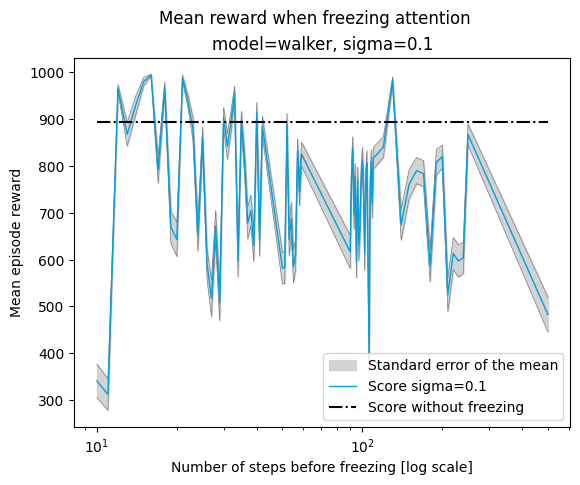

In [14]:
plt.xscale('log')
plt.xlabel('Number of steps before freezing [log scale]')
plt.ylabel('Mean episode reward')
average_y = []
mean = np.array(mean)
sem = np.array(sem)
for ind in range(len(mean) - window + 1):
    average_y.append(np.mean(mean[ind:ind+window]))
for ind in range(window - 1):
    average_y.insert(0, np.nan)
#plt.errorbar(x, mean[sigma], yerr=std[sigma], linewidth=1, elinewidth=0.5, capsize=2, 
#             label=f'Score sigma={sigma_train[0]}.{sigma_train[1]}')
plt.plot(x, mean+sem, color='gray', linewidth=0.5)
plt.plot(x, mean-sem, color='gray', linewidth=0.5)
plt.fill_between(x, mean-sem, mean+sem, color='lightgray', label='Standard error of the mean')
plt.plot(x, mean, '-', label=f'Score sigma={sigma_train[0]}.{sigma_train[1]}', linewidth=1, color='#00a0de')
# plt.plot(x, average_y, '-', label=f'Moving average window={window}', linewidth=2, color='#fcb500')
# plt.plot(x, mean[sigma], 'o')
if all_steps is not None:
    plt.plot(x, [all_steps] * len(x), '-.', color='black', label='Score without freezing')
plt.title(f'model={model_name}, sigma={sigma_train[0]}.{sigma_train[1]}')
plt.suptitle('Mean reward when freezing attention')
plt.legend()
plt.show()